In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smarthomedata/smarthome.xlsx


智能家居品类精品店铺运营提升分析与营销实践
精品类运营模式通常指的是一种专注于高品质、独特性、以及提供卓越客户体验的商业运营方式。这种模式在多个方面与传统的量产和大众市场运营模式有
所不同:√ 高品质和独特性:精品类运营模式强调产品的高品质和独特性。这些产品通常具有优越的设计、材料、工艺或者是独特的品牌故事。它们可能是手工制作的，或者在生产过程中注重细节和个性化。
√目标客户群体:精品运营模式通常针对的是对品质、设计和独特性有更高要求的细分市场。这类消费者更注重产品的独特性和个性化，而不是仅仅追求功能性或成本效益。
√客户体验:精品类运营模式非常重视客户体验。这包括提供高水平的客户服务、创造独特的购物体验、以及建立个性化的客户关系。
√ 定价策略:由于精品类产品强调品质和独特性，其定价策略通常是高端定价，以反映其独特价值和品牌定位。
√ 营销和品牌传播:在精品类运营模式中，营销和品牌传播通常采用更为精细化和定制化的策略。品牌故事、品质保证和独特的设计理念是营销传播的重要组成部分。
√ 销售渠道:精品类产品可能通过专门的精品店、高端零售商、或者专属的在线平台销售，以确保品牌形象和客户体验的一致性。
随着物联网、人工智能、和无线通信技术的发展，智能家居设备变得更加高效、可靠和易于使用。智能家居产品如智能灯光、智能安全系统、智能恒温器等,为用户提供了极大的便利，改善了日常生活的质量。此外，智能家居产品能够有效地节省能源，如通过智能恒温器节省暖气和空调的能耗。随着全球环保意识的提升,越来越多的消费者倾向于选择能够帮助他们减少能耗和碳排放的智能家居产品。
与此同时，智能家居类产品被定位为高端市场，针对的是追求高品质生活的消费者群体，这自然导致了较高的客单价。而高客单价往往意味着高利润，因此智能家居品类无疑也是跨境电商企业采用“精品类运营”模式的较好选择。
二、数据集介绍
本题提供的数据是 AliExpress 全球速卖通平台上某一真实智能家居品类店铺1年内的实际订单数据，数据已经过脱敏处理，时间为2022年5月-2023 年4月，详细见附件。
三、任务1:行业背景调研
本任务为开放式，可参考以下分析方向:
智能家居行业背景分析:①市场规模分析、②行业渗透率、③行业融资等。
跨境电商智能家居类品类调研:①不同平台女装品类相关分析(销售情况、发展趋势、消费者偏好等)、②消费者国别分布分析、③热销属性分析等。
请在报告中给出数据采集出处、处理过程、必要结果及相关分析
四、任务 2:数据预处理
可参考以下步骤:
数据排序、数据计算、数据清洗、数据转化、特征编码等请在报告中给出处理过程、必要结果及相关分析。
五、任务 3:店铺运营情况分析
通过分析运营数据，企业能更好地理解目标市场的特征和需求，从而使其产品和服务更准确地对准目标客户群。可参考以下分析方向:
铺货店铺的淡旺季分析
季节性产品分析、大促产品分析(哪些产品在特定的节日或者季节热销)
消费者国别分析
热销属性分析(热销颜色、尺寸等)
复购率分析
销售趋势预测
六、任务 4:精品店铺运营提升分析
根据店铺数据给出精品店铺运营提升的方向，可参考如下分析方向:滞销产品的处理(优化或移除)
备货建议
直通车或营销活动建议
供应商选择(www.1688.com)
价格优化
另外，店铺运营提升的不止局限于附件中的数据，选手们可根据跨境电商市场现实情况以及对店铺定位的理解进行选品分析，旨在提升该智能家居品类速卖通店铺的综合竞争力。
请在报告中给出必要结果及相关分析。
七、任务 5:数字营销实践活动
本模块为开放式，请根据上述分析结果进行数字营销实践活动，包括站内营销、基于关键词的营销、内容营销。站内营销是基于跨境电商企业真正运营的第三方电商平台开展站内营销活动;基于关键词的营销是通过数据分析得到候选关键词，再利用这些关键词设计和优化搜索引擎或社交媒体的关键词广告的方案;内容营销是在数据分析的基础之上进行图文营销、短视频营销、中视频营销。
说明:①参赛团队至少完成一种以上的数字营销实践活动。②输出形式不限，如营销方案、海报图文、短(中)视频脚本、短(中)视频链接或二维码等
八、任务6:可视化展示及总结
对上述分析结果进行进一步的整理，输出可视化的大屏，形成报告总结。

In [2]:
# 读取xlsx文件  
data = pd.read_excel('/kaggle/input/smarthomedata/smarthome.xlsx')  
  
# 查看前几行数据  
print(data.head())


               下单时间                   买家名称                         买家选择物流  \
0  2022-04-30 09:13  Antonietta Giovannini  Seller's Shipping Method - ES   
1  2022-04-30 09:34            gioole user   Cainiao Super Economy Global   
2  2022-04-30 10:26           zachi zaizev   AliExpress Standard Shipping   
3  2022-04-30 10:46           Artem Lushov       Seller's Shipping Method   
4  2022-04-30 13:41          Raymond Abell   AliExpress Standard Shipping   

       产品总金额              付款时间              发货时间              发货期限  \
0  US $14.22  2022-04-30 09:13  2022-04-30 11:00  2022-05-10 09:13   
1   US $4.86  2022-04-30 09:35  2022-05-02 23:43  2022-05-10 09:35   
2  US $16.72  2022-04-30 10:27  2022-05-02 02:03  2022-05-10 10:27   
3  US $12.36  2022-04-30 10:46  2022-05-04 21:08  2022-05-10 10:46   
4  US $17.55  2022-04-30 13:41  2022-05-02 02:03  2022-05-10 13:41   

                                                商品信息  \
0  【1】   Tuya Mini WiFi DIY Switch 16A 2 Way Cont...   
1  【

In [3]:
# 创建中文列名到英文列名的映射字典  
chinese_to_english_columns = {  
    '下单时间': 'Order_Time',  
    '买家名称': 'Buyer_Name',  
    '买家选择物流': 'Selected_Logistics',  
   '产品总金额':'Total_Product_Amount',
'付款时间':'Payment_Time',
'发货时间':'Shipment_Time',
'发货期限':'Shipment_Deadline',
'商品信息':'Product_Information',
'商品编码':'Product_Code',
'地址':'Address',
'城市':'City',
'实际发货单号': 'Actual_Shipping_Number',
'州/省':'State/Province',
'平台是否代征代缴':'Platform_Tax_Collection',
'店铺优惠':'Store_Discount',
'手机':'Phone_Number',
'收件人名称':'Recipient_Name',
'收货国家':'Delivery_Country',
'收货地址':'Delivery Address',
'物流费用':'Shipping_Cost',
'确认收货时间':'Confirmation Time',
'订单备注':'Order_Notes',
'订单状态':'Order_Status',
'订单金额':'Order_Amount',
'负责人（业务员）':'Responsible_Person',
'预计增值税':'Estimated_VAT',
'联系电话':'Contact_Number',
'订单号':'Order_Number',
'邮编':'Postal_Code', 
    '邮编': 'Postal_Code' , 
}  

In [4]:
# 使用映射字典重命名列名  
data.rename(columns=chinese_to_english_columns, inplace=True)

In [5]:
# 打印前几行以检查列名  
print(data.head())

         Order_Time             Buyer_Name             Selected_Logistics  \
0  2022-04-30 09:13  Antonietta Giovannini  Seller's Shipping Method - ES   
1  2022-04-30 09:34            gioole user   Cainiao Super Economy Global   
2  2022-04-30 10:26           zachi zaizev   AliExpress Standard Shipping   
3  2022-04-30 10:46           Artem Lushov       Seller's Shipping Method   
4  2022-04-30 13:41          Raymond Abell   AliExpress Standard Shipping   

  Total_Product_Amount      Payment_Time     Shipment_Time Shipment_Deadline  \
0            US $14.22  2022-04-30 09:13  2022-04-30 11:00  2022-05-10 09:13   
1             US $4.86  2022-04-30 09:35  2022-05-02 23:43  2022-05-10 09:35   
2            US $16.72  2022-04-30 10:27  2022-05-02 02:03  2022-05-10 10:27   
3            US $12.36  2022-04-30 10:46  2022-05-04 21:08  2022-05-10 10:46   
4            US $17.55  2022-04-30 13:41  2022-05-02 02:03  2022-05-10 13:41   

                                 Product_Information  \


In [6]:
#查找缺少值
missing_values = data.isnull() 
# 打印出哪些位置有缺失值  
print(missing_values)

       Order_Time  Buyer_Name  Selected_Logistics  Total_Product_Amount  \
0           False       False               False                 False   
1           False       False               False                 False   
2           False       False               False                 False   
3           False       False               False                 False   
4           False       False               False                 False   
...           ...         ...                 ...                   ...   
44568       False       False               False                 False   
44569       False       False               False                 False   
44570       False       False               False                 False   
44571       False       False               False                 False   
44572       False       False               False                 False   

       Payment_Time  Shipment_Time  Shipment_Deadline  Product_Information  \
0             False  

In [7]:
# 计算每一列中缺失值的数量  
missing_counts = data.isnull().sum()  
print(missing_counts)  


Order_Time                     0
Buyer_Name                     2
Selected_Logistics             0
Total_Product_Amount           0
Payment_Time                3113
Shipment_Time               4087
Shipment_Deadline              4
Product_Information            0
Product_Code                   1
Address                        0
City                           0
Actual_Shipping_Number      4087
State/Province                16
Platform_Tax_Collection    23494
Store_Discount                 0
Phone_Number               18253
Recipient_Name                 0
Delivery_Country               0
Delivery Address           17702
Shipping_Cost                  0
Confirmation Time           7404
Order_Notes                44504
Order_Status                   0
Order_Amount                   0
Responsible_Person             0
Estimated_VAT              23494
Contact_Number             17798
Order_Number                   0
Postal_Code                 3908
dtype: int64


In [8]:
data.shape[0]

44573

In [9]:
#计算缺少值的比例
# 首先计算每一列的缺失值数量   
missing_counts = data.isnull().sum() 
# 然后计算总的行数  
total_rows = data.shape[0]  
# 计算缺失数据比例  
missing_ratio = missing_counts / total_rows
# 打印出每一列的缺失数据比例  
print(missing_ratio)

Order_Time                 0.000000
Buyer_Name                 0.000045
Selected_Logistics         0.000000
Total_Product_Amount       0.000000
Payment_Time               0.069840
Shipment_Time              0.091692
Shipment_Deadline          0.000090
Product_Information        0.000000
Product_Code               0.000022
Address                    0.000000
City                       0.000000
Actual_Shipping_Number     0.091692
State/Province             0.000359
Platform_Tax_Collection    0.527090
Store_Discount             0.000000
Phone_Number               0.409508
Recipient_Name             0.000000
Delivery_Country           0.000000
Delivery Address           0.397146
Shipping_Cost              0.000000
Confirmation Time          0.166110
Order_Notes                0.998452
Order_Status               0.000000
Order_Amount               0.000000
Responsible_Person         0.000000
Estimated_VAT              0.527090
Contact_Number             0.399300
Order_Number               0

In [10]:
# 创建一个布尔序列，标记缺失值比例低于10%的列
columns_to_drop = missing_ratio < 0.10 
# 删除缺失值比例低于10%的行
df_dropped = data.drop(columns_to_drop[columns_to_drop].index, axis=1)   
  
# 输出处理后的DataFrame  
print(df_dropped)

      Platform_Tax_Collection Phone_Number  \
0                        平台已税   3703645418   
1                        平台已税   6942012430   
2                         NaN    537269999   
3                         NaN   9268130528   
4                        平台已税    652624597   
...                       ...          ...   
44568                    平台已税   3493815552   
44569                    平台已税    607637233   
44570                    平台已税    616147339   
44571                     NaN   5521001979   
44572                    平台已税    917219611   

                                        Delivery Address Confirmation Time  \
0      Via C.Martignoni, 27 ALDENO、Trento、Trentino-Al...  2022-05-25 11:02   
1                       Skouloudi M. 3、Gazi、Crete、Greece  2022-06-12 08:00   
2                   HSEKMA 224 224、GINATON、ISRAEL、Israel  2022-05-29 00:42   
3      Noviy Gorodok (Новый Городок), 32 69、Odincovo ...  2022-06-04 06:04   
4      Pittsburghstraat 9、Rotterdam、Zuid Holland、Neth... 

物流交付分析
进行订单响应时长、订单发货时长、物流在途时间、订单交付时长 

In [11]:
#步骤一：加载数据；
data=pd.read_excel('/kaggle/input/smarthomedata/smarthome.xlsx')

In [12]:
data.head(5)

,下单时间,买家名称,买家选择物流,产品总金额,付款时间,发货时间,发货期限,商品信息,商品编码,地址,...,物流费用,确认收货时间,订单备注,订单状态,订单金额,负责人（业务员）,预计增值税,联系电话,订单号,邮编
0,2022-04-30 09:13,Antonietta Giovannini,Seller's Shipping Method - ES,US $14.22,2022-04-30 09:13,2022-04-30 11:00,2022-05-10 09:13,【1】 Tuya Mini WiFi DIY Switch 16A 2 Way Cont...,ALMQIKBBSTjZ5N23N3D02899K3G_X0V18MJ0916-40Za3b...,"Via C.Martignoni, 27 ALDENO",...,US $0.00,2022-05-25 11:02,NaN,交易完成,US $11.66,null null,US $2.56,39.0,3016602292206320,38060
1,2022-04-30 09:34,gioole user,Cainiao Super Economy Global,US $4.86,2022-04-30 09:35,2022-05-02 23:43,2022-05-10 09:35,【1】 RE5V1C 5V WiFi Smart Switch eWeLink Inch...,ALHNYM6640PZWNQ2S6E054V8Z1QQO0LF2YSEFDYR * 1,Skouloudi M. 3,...,US $0.00,2022-06-12 08:00,NaN,交易完成,US $3.88,null null,US $0.93,30.0,8149322817552550,NaN
2,2022-04-30 10:26,zachi zaizev,AliExpress Standard Shipping,US $16.72,2022-04-30 10:27,2022-05-02 02:03,2022-05-10 10:27,【1】 WiFi Temperature Humidity Sensor Indoor ...,ALXY4QIHKAbZGNL3Z4S3532126Z_Y0A1JMB0V1DY * 1,HSEKMA 224 224,...,US $0.00,2022-05-29 00:42,NaN,交易完成,US $16.72,null null,NaN,972.0,8149727178429630,7311000
3,2022-04-30 10:46,Artem Lushov,Seller's Shipping Method,US $12.36,2022-04-30 10:46,2022-05-04 21:08,2022-05-10 10:46,"【1】 Tuya Alice Wifi Smart Switch, 16A 2Way M...",ALFRWIWJB8PZWNM26608G133X1TYQ4OW3CBNRLVG * 3,"Noviy Gorodok (Новый Городок), 32 69",...,US $0.00,2022-06-04 06:04,NaN,交易完成,US $12.24,null null,NaN,7.0,5027762282620590,143074
4,2022-04-30 13:41,Raymond Abell,AliExpress Standard Shipping,US $17.55,2022-04-30 13:41,2022-05-02 02:03,2022-05-10 13:41,【1】 Tuya Door Window Opening Sensor Detector...,ALMYBTLA7QVZJNS395U429A704I_V0L10L8EK5OU * 3,Pittsburghstraat 9,...,US $3.59,2022-05-16 13:07,NaN,交易完成,US $17.47,null null,US $3.67,31.0,8149646547103460,NaN


步骤二：数据清洗和预处理
在进行分析之前，你可能需要清洗和预处理数据，例如处理缺失值、转换数据类型等。

In [13]:
# 检查缺失值  
print(data.isnull().sum())  
  
# 根据需要处理缺失值，例如填充或删除含有缺失值的行  
data.dropna(inplace=True)  # 示例：删除含有缺失值的行  
  
# 确保时间相关的列是日期时间格式  
data['下单时间'] = pd.to_datetime(data['下单时间'])  
data['付款时间'] = pd.to_datetime(data['付款时间'])  
data['发货时间'] = pd.to_datetime(data['发货时间'])  
data['确认收货时间'] = pd.to_datetime(data['确认收货时间'])

下单时间            0
买家名称            2
买家选择物流          0
产品总金额           0
付款时间         3113
发货时间         4087
发货期限            4
商品信息            0
商品编码            1
地址              0
城市              0
实际发货单号       4087
州/省            16
平台是否代征代缴    23494
店铺优惠            0
手机          18253
收件人名称           0
收货国家            0
收货地址        17702
物流费用            0
确认收货时间       7404
订单备注        44504
订单状态            0
订单金额            0
负责人（业务员）        0
预计增值税       23494
联系电话        17798
订单号             0
邮编           3908
dtype: int64


步骤三：计算订单响应时长、发货时长、物流在途时间和订单交付时长

In [14]:
# 计算订单响应时长（下单时间到付款时间）  
data['订单响应时长'] = (data['付款时间'] - data['下单时间']).dt.total_seconds() / 60  # 转换为分钟  

In [15]:
# 计算订单发货时长（付款时间到发货时间）  
data['订单发货时长'] = (data['发货时间'] - data['付款时间']).dt.total_seconds() / 60  # 转换为分钟  
  
# 计算物流在途时间（发货时间到确认收货时间）  
data['物流在途时间'] = (data['确认收货时间'] - data['发货时间']).dt.total_seconds() / 60  # 转换为分钟  
  
# 计算订单交付时长（下单时间到确认收货时间）  
data['订单交付时长'] = (data['确认收货时间'] - data['下单时间']).dt.total_seconds() / 60  # 转换为分钟


步骤四：进行统计分析
现在你可以对计算出的时长进行统计分析，例如计算平均值、中位数、标准差等。

In [16]:
# 计算平均订单响应时长  
avg_response_time = data['订单响应时长'].mean()  
print(f"平均订单响应时长: {avg_response_time:.2f} 分钟")  
  

平均订单响应时长: 0.17 分钟


In [17]:
# 计算平均订单发货时长  
avg_shipping_time = data['订单发货时长'].mean()  
print(f"平均订单发货时长: {avg_shipping_time:.2f} 分钟") 

平均订单发货时长: 1866.25 分钟


In [18]:
# 计算平均物流在途时间  
avg_transit_time = data['物流在途时间'].mean()  
print(f"平均物流在途时间: {avg_transit_time:.2f} 分钟")  

平均物流在途时间: 23801.42 分钟


In [19]:
# 计算平均订单交付时长  
avg_delivery_time = data['订单交付时长'].mean()  
print(f"平均订单交付时长: {avg_delivery_time:.2f} 分钟")

平均订单交付时长: 25667.83 分钟


以使用describe()函数来快速获取这些时长的统计摘要

In [20]:
# 获取订单响应时长的统计摘要  
print(data['订单响应时长'].describe())  
  
# 获取订单发货时长的统计摘要  
print(data['订单发货时长'].describe())  
  
# 获取物流在途时间的统计摘要  
print(data['物流在途时间'].describe())  
  
# 获取订单交付时长的统计摘要  
print(data['订单交付时长'].describe())


count    12.000000
mean      0.166667
std       0.389249
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: 订单响应时长, dtype: float64
count      12.000000
mean     1866.250000
std       937.574252
min       516.000000
25%      1006.250000
50%      2044.500000
75%      2553.000000
max      3408.000000
Name: 订单发货时长, dtype: float64
count       12.000000
mean     23801.416667
std       8415.092291
min      11533.000000
25%      16392.750000
50%      25515.000000
75%      28255.250000
max      36163.000000
Name: 物流在途时间, dtype: float64
count       12.000000
mean     25667.833333
std       8389.352373
min      13713.000000
25%      17486.500000
50%      27132.000000
75%      29718.750000
max      39409.000000
Name: 订单交付时长, dtype: float64


步骤五：可视化分析
你还可以使用matplotlib或seaborn等库来可视化这些时长的分布情况

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

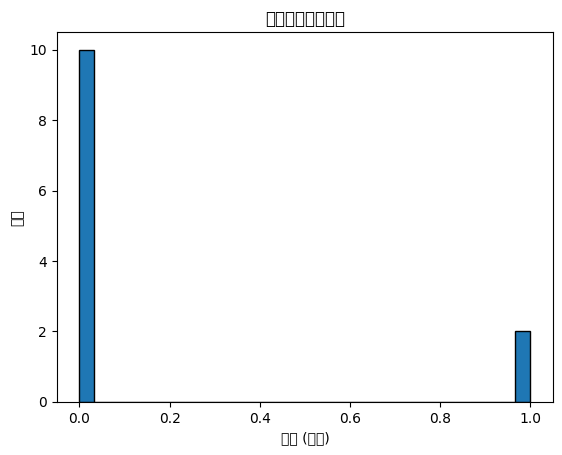

In [21]:
import matplotlib.pyplot as plt  
  
# 绘制订单响应时长的直方图  
plt.hist(data['订单响应时长'], bins=30, edgecolor='black')  
plt.title('订单响应时长分布')  
plt.xlabel('时长 (分钟)')  
plt.ylabel('频数')  
plt.show()  
  
# 你也可以对其他时长进行类似的可视化分析

In [22]:
#按月份分析订单时长
# 提取月份信息  
data['下单月份'] = data['下单时间'].dt.month  
  
# 按月份分组并计算平均时长  
monthly_avg_times = data.groupby('下单月份').agg({  
    '订单响应时长': 'mean',  
    '订单发货时长': 'mean',  
    '物流在途时间': 'mean',  
    '订单交付时长': 'mean'  
}).reset_index()  
  
# 显示结果  
print(monthly_avg_times)

   下单月份    订单响应时长       订单发货时长    物流在途时间    订单交付时长
0     2  0.000000  1808.000000  28606.50  30414.50
1     3  0.166667  1756.333333  28852.50  30609.00
2     4  0.250000  2060.250000  13822.25  15882.75


按商品分析订单时长
如果数据中包含商品信息，我们可以按商品名称对订单进行分组，并计算每个商品的平均订单响应时长、发货时长、物流在途时间和订单交付时长。

In [23]:
merchant_avg_times = data.groupby('商品编码').agg({  
    '订单响应时长': 'mean',  
    '订单发货时长': 'mean',  
    '物流在途时间': 'mean',  
    '订单交付时长': 'mean'  
}).reset_index()  
  
# 显示结果  
print(merchant_avg_times)

                                                 商品编码  订单响应时长  订单发货时长  \
0        AL2PNI8W0KbZINU3M4H4J8H5O5N_80T1JME0M2HN * 1     0.0  2721.0   
1        AL39JWPF0IbZ0NG35793H13441B_X061SMT0Y49H * 1     1.0   968.0   
2        AL8VBO8FAPbZKN13K727R253W7Y_M0G10MB077XC * 1     0.0  1909.0   
3        AL9WT6L2KKbZ8NK3T7B3G1I8G62_40I1NMU073JM * 1     0.0  2180.0   
4        ALDTG8G0J8VZ6NY3P6T648I7T7A_F0A1QFNNO70B * 2     0.0   870.0   
5        ALJGL42YR5VZENV3F4Q4U8E5L51_G0X1FTV07JXT * 1     0.0  1019.0   
6   ALJK7YVAVMVZENR3F7A3G1R4410_U0F1TM89XBJ7 * 1;A...     0.0  1119.0   
7        ALL557ZS31bZFN7387I7R2J3I7G_3091XMG0M28Q * 1     0.0  3408.0   
8        ALO14B0VGSbZYN4317P0U5W7M1N_B0W1LM9082DB * 1     0.0  2824.0   
9        ALTLHQ8NSPVZMNG3K7C7W2F3Q7H_T0J1YHVBTBPC * 2     1.0   516.0   
10       ALTS1GY8C1VZ7N73J770052781Y_O0Q1137TXBVI * 1     0.0  2364.0   
11       ALXFMHYZH0VZTNT3C7Q301T4S1U_X021WQ6S4G5B * 1     0.0  2497.0   

     物流在途时间   订单交付时长  
0   12395.0  15116.0  
1   

分析订单延期交付时长
为了分析订单延期交付时长，我们首先需要定义什么是“延期交付”。一种常见的定义是订单交付时间超过了某个预定的时间限制。我们可以根据确认收货时间和发货时间加上一个预定的发货期限来计算延期交付的时长。

In [24]:
data.head()

,下单时间,买家名称,买家选择物流,产品总金额,付款时间,发货时间,发货期限,商品信息,商品编码,地址,...,负责人（业务员）,预计增值税,联系电话,订单号,邮编,订单响应时长,订单发货时长,物流在途时间,订单交付时长,下单月份
25415,2023-02-01 23:56:00,Rafal Cz,Cainiao Super Economy Global\nAliExpress Stand...,US $11.61,2023-02-01 23:56:00,2023-02-02 18:35:00,2023-02-12 23:56,【1】 Tuya Smart WiFi Door Sensor Smart Door O...,ALJK7YVAVMVZENR3F7A3G1R4410_U0F1TM89XBJ7 * 1;A...,Bystra Podhalanska 129,...,null null,US $2.15,48.0,8161845366714070,34235,0.0,1119.0,27904.0,29023.0,2
31237,2023-02-25 10:29:00,Gregor Pavlic,AliExpress Standard Shipping,US $5.84,2023-02-25 10:29:00,2023-02-27 04:06:00,2023-03-07 10:29,【1】 Tuya WiFi Smart Door Sensor Door Open Cl...,ALXFMHYZH0VZTNT3C7Q301T4S1U_X021WQ6S4G5B * 1,Podkum 80,...,null null,US $1.04,386.0,8163079144421370,1414,0.0,2497.0,29309.0,31806.0,2
35087,2023-03-13 10:23:00,Alberto Molina,Aliexpress Selection Standard,US $29.84,2023-03-13 10:24:00,2023-03-14 02:32:00,2023-03-22 10:24,【1】 Tuya WiFi Smart Door Sensor Door Open Cl...,AL39JWPF0IbZ0NG35793H13441B_X061SMT0Y49H * 1,Calle Batán 31,...,null null,US $5.13,34.0,3021965878777330,2210,1.0,968.0,36163.0,37132.0,3
36694,2023-03-20 05:57:00,Gregor Pavlic,Aliexpress Selection Saver,US $6.09,2023-03-20 05:57:00,2023-03-21 21:21:00,2023-03-29 05:57,【1】 ZigBee Door Window Sensor Detector Tuya ...,ALTS1GY8C1VZ7N73J770052781Y_O0Q1137TXBVI * 1,Podkum 80,...,null null,US $1.09,386.0,8164410900441370,1414,0.0,2364.0,24783.0,27147.0,3
37089,2023-03-21 09:31:00,Gregor Pavlic,Aliexpress Selection Standard,US $9.75,2023-03-21 09:31:00,2023-03-22 02:30:00,2023-03-30 09:31,【1】 WiFi/ZigBee Smart Plug Socket EU 16A/20A...,ALJGL42YR5VZENV3F4Q4U8E5L51_G0X1FTV07JXT * 1,Podkum 80,...,null null,US $1.74,386.0,8164412246351370,1414,0.0,1019.0,23557.0,24576.0,3


In [25]:
# 确保发货期限和确认收货时间都是datetime类型  
data['发货期限'] = pd.to_datetime(data['发货期限'])  
data['确认收货时间'] = pd.to_datetime(data['确认收货时间']) 


In [26]:
# 计算订单是否延期交付，如果确认收货时间晚于发货期限则为True，否则为False  
data['是否延期'] = (data['确认收货时间'] > data['发货期限']).astype(int)  

In [27]:
# 计算延期交付的订单的平均延期时长  
# 这里使用确认收货时间与发货期限之间的时间差作为延期时长  
delayed_orders = data[data['是否延期'] == 1]  
avg_delay_time = (delayed_orders['确认收货时间'] - delayed_orders['发货期限']).dt.total_seconds() / 60  
avg_delay_time = avg_delay_time.mean()  
  
print(f"平均延期交付时长: {avg_delay_time:.2f} 分钟") 

平均延期交付时长: 12223.55 分钟


In [28]:
# 如果你想查看每个延期订单的延期时长，可以这样做：  
delayed_orders['延期时长'] = (delayed_orders['确认收货时间'] - delayed_orders['发货期限']).dt.total_seconds() / 60  
print(delayed_orders[['订单号', '延期时长']])

                    订单号     延期时长
25415  8161845366714070  13183.0
31237  8163079144421370  17406.0
35087  3021965878777330  24171.0
36694  8164410900441370  14187.0
37089  8164412246351370  11616.0
38822  8165007545142060  10993.0
38889  3022234010213260  20689.0
38954  3022309972067890  15597.0
40786  3022526307511050   1781.0
42676  8166100502621370    716.0
43206  8166874558661370   4120.0


/tmp/ipykernel_18/4157038123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_orders['延期时长'] = (delayed_orders['确认收货时间'] - delayed_orders['发货期限']).dt.total_seconds() / 60


如果你想要进一步分析哪些月份或哪些商家的订单更容易延期交付，你可以按照之前提到的分组聚合的方法来进行：

In [29]:
# 按月份分析延期交付的订单数  
delayed_by_month = delayed_orders.groupby('下单月份').size().reset_index(name='延期订单数')  

In [30]:
# 按商家分析延期交付的订单数  
delayed_by_merchant = delayed_orders.groupby('商品编码').size().reset_index(name='延期订单数') 

In [31]:
# 显示结果  
print(delayed_by_month)  
print(delayed_by_merchant)

   下单月份  延期订单数
0     2      2
1     3      6
2     4      3
                                                 商品编码  延期订单数
0        AL2PNI8W0KbZINU3M4H4J8H5O5N_80T1JME0M2HN * 1      1
1        AL39JWPF0IbZ0NG35793H13441B_X061SMT0Y49H * 1      1
2        AL8VBO8FAPbZKN13K727R253W7Y_M0G10MB077XC * 1      1
3        ALDTG8G0J8VZ6NY3P6T648I7T7A_F0A1QFNNO70B * 2      1
4        ALJGL42YR5VZENV3F4Q4U8E5L51_G0X1FTV07JXT * 1      1
5   ALJK7YVAVMVZENR3F7A3G1R4410_U0F1TM89XBJ7 * 1;A...      1
6        ALL557ZS31bZFN7387I7R2J3I7G_3091XMG0M28Q * 1      1
7        ALO14B0VGSbZYN4317P0U5W7M1N_B0W1LM9082DB * 1      1
8        ALTLHQ8NSPVZMNG3K7C7W2F3Q7H_T0J1YHVBTBPC * 2      1
9        ALTS1GY8C1VZ7N73J770052781Y_O0Q1137TXBVI * 1      1
10       ALXFMHYZH0VZTNT3C7Q301T4S1U_X021WQ6S4G5B * 1      1


销售环节分析
